In [1]:
import sys
sys.path.append('..')

from baselines.gnn.trainer import Trainer

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [2]:
import time
start = time.time()
trainer = Trainer(architecture='cgcn', hidden_dim=32, lr=1e-3)
stop = time.time()
print(f'Elapsed time: {stop-start} [s]') 

Elapsed time: 65.01940989494324 [s]


Epoch 93/100, Train Loss: 2484.1542, lr: 0.000125
Val Loss: 3017.4092
---------
Epoch 94/100, Train Loss: 2482.2595, lr: 0.000125
Val Loss: 3017.8399
---------
Epoch 95/100, Train Loss: 2480.3349, lr: 0.000125
Val Loss: 3018.2629
---------
Epoch 96/100, Train Loss: 2478.4641, lr: 0.000125
Val Loss: 3018.5939
---------
Epoch 97/100, Train Loss: 2476.6059, lr: 0.000125
Val Loss: 3018.9467
---------
Epoch 98/100, Train Loss: 2474.7844, lr: 0.000125
Val Loss: 3019.2671
---------
Epoch 99/100, Train Loss: 2472.9837, lr: 0.000125
Val Loss: 3019.5704
---------

[Callback] Adjusting lr. Counter: 10

Epoch 100/100, Train Loss: 2461.7144, lr: 6.25e-05
Val Loss: 3011.8880
---------
1520.1190974712372 [s]


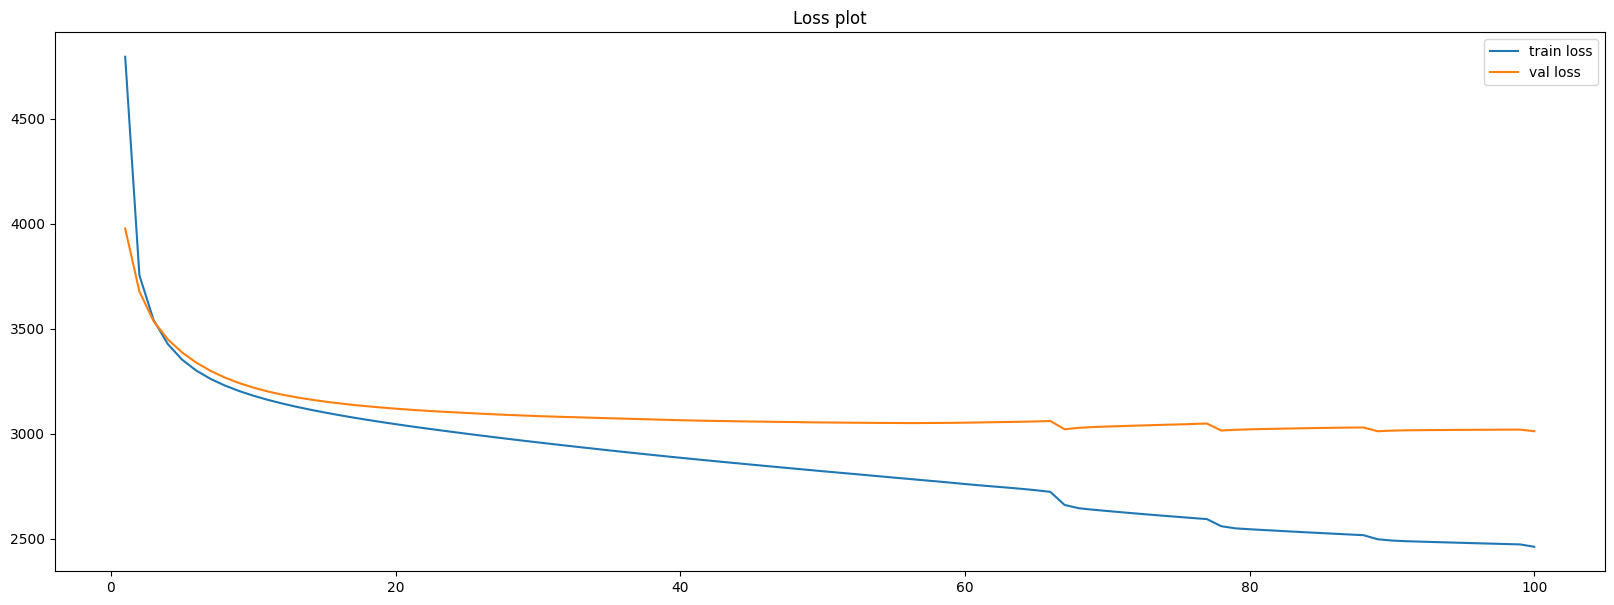

In [3]:
trainer.train(num_epochs=100)

In [ ]:
trainer.plot_predictions("train")

In [ ]:
trainer.plot_predictions("val")

In [ ]:
trainer.plot_predictions("test")

In [4]:
trainer.evaluate("train")

RMSE for t2m: 1.6532519744417922; MAE for t2m: 1.2573000479110237;
RMSE for sp: 2.1785298813934943; MAE for sp: 1.613906591456585;
RMSE for tcc: 0.27017616743212053; MAE for tcc: 0.2092087223384912;
RMSE for u10: 1.3403400014490854; MAE for u10: 0.9898785619557463;
RMSE for v10: 1.3119931014162822; MAE for v10: 0.9671288899340685;
RMSE for tp: 0.0002484335820358281; MAE for tp: 0.0001011445724886929;


In [5]:
trainer.evaluate("val")

RMSE for t2m: 1.846613352966276; MAE for t2m: 1.379401735567181;
RMSE for sp: 2.2810034953504035; MAE for sp: 1.691337000024572;
RMSE for tcc: 0.28105547577462836; MAE for tcc: 0.2196932422233514;
RMSE for u10: 1.4595428760205338; MAE for u10: 1.0722755825534356;
RMSE for v10: 1.4296039578494977; MAE for v10: 1.0465897031885634;
RMSE for tp: 0.0002903016244613565; MAE for tp: 0.0001073195943979322;


In [6]:
trainer.evaluate("test")

RMSE for t2m: 1.7308520625058639; MAE for t2m: 1.3247728998925457;
RMSE for sp: 2.3992479669737645; MAE for sp: 1.7568102339318754;
RMSE for tcc: 0.2805274129657387; MAE for tcc: 0.21913696437798416;
RMSE for u10: 1.4401554352858472; MAE for u10: 1.0654466357169252;
RMSE for v10: 1.4595404951536077; MAE for v10: 1.0686582104736524;
RMSE for tp: 0.0002717262792747912; MAE for tp: 0.00010331567566263692;


# [CGCN]

### Full training:

N = 5; hidden = 32; batch=4; s = 3:
 
RMSE for f0: 2.2464043976548047; MAE for f0: 1.6999678436793948;

RMSE for f1: 1.9364765893388307; MAE for f1: 1.408220916940946;

RMSE for f2: 0.28386787466464225; MAE for f2: 0.21952327282997064;

RMSE for f3: 1.411270602820433; MAE for f3: 1.0502013356032074;

RMSE for f4: 1.412410520285922; MAE for f4: 1.0404767270553594;

RMSE for f5: 0.0002722878701922671; MAE for f5: 0.0001054861260521275;

------------------------------------------------------------------------

N = 5; hidden = 64; batch=4; s = 3:

RMSE for f0: 2.205407197194004; MAE for f0: 1.6519353043910658;

RMSE for f1: 2.029980887836009; MAE for f1: 1.4714761668475365;

RMSE for f2: 0.28731255755261337; MAE for f2: 0.22192368753909236;

RMSE for f3: 1.4478491874482888; MAE for f3: 1.0733782789693203;

RMSE for f4: 1.4493260989133352; MAE for f4: 1.058615083231145;

RMSE for f5: 0.0002749573712955729; MAE for f5: 0.00010411299434883103;

------------------------------------------------------------------------

With bigger batch_size training is more stable (almost no overfitting) but it does not improve performance

------------------------------------------------------------------------

N = 10; hidden = 32; batch=32; no significant difference, much longer training; even worse performance

------------------------------------------------------------------------

N = 10; hidden = 32; batch=32; mlp - 3 layers for encoder and decoder each - totally failed to learn sufficient representation; loss after 100 epochs is 2x bigger

------------------------------------------------------------------------

With gradient clip=100; h=32; b=32; n=5 -> loss plot is more smooth; no performance improvement

------------------------------------------------------------------------

Using learning constants advised by authors of graphcast does not improve performance (it is actually worse) but training is super stable - no overfittin at all:
clip=32; self.optimizer = torch.optim.AdamW(self.model.parameters(), betas=(0.9, 0.95), weight_decay=0.1); h=32; b=32

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 7

Epoch 100/100, Train Loss: 1848.7699, lr: 3.125e-05 Val Loss: 2230.6389
735.7001855373383 [s]22666046945865614

RMSE for t2m: 1.8891855143316563; MAE for t2m: 1.4600152796625336;

RMSE for sp: 2.0393454691406316; MAE for sp: 1.5120049358744065;

RMSE for tcc: 0.2860184447921189; MAE for tcc: 0.22666046945865614;

RMSE for u10: 1.4378177755816777; MAE for u10: 1.0736904505733116;

RMSE for v10: 1.4574477223923084; MAE for v10: 1.0663613129750227;

RMSE for tp: 0.0002711004547077864; MAE for tp: 0.00010284140930705948;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 3

Epoch 99/100, Train Loss: 1955.0575, lr: 0.0005 Val Loss: 2207.3025

693.315672159195 [s]

RMSE for t2m: 2.3858469221825898; MAE for t2m: 1.8332994478389537;

RMSE for sp: 1.9815898823743083; MAE for sp: 1.4750331930477616;

RMSE for tcc: 0.28416700897460695; MAE for tcc: 0.23001444125440887;

RMSE for u10: 1.4444404739897925; MAE for u10: 1.0740849332227052;

RMSE for v10: 1.4384182183045433; MAE for v10: 1.05619047567965;

RMSE for tp: 0.0002669724249068656; MAE for tp: 0.00010341137409668945;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 5

Epoch 100/100, Train Loss: 1901.1544, lr: 6.25e-05 Val Loss: 2181.1193

678.085875749588 [s]

RMSE for t2m: 1.8778959983044772; MAE for t2m: 1.4465936457254398;

RMSE for sp: 2.190103341129505; MAE for sp: 1.6404208756272267;

RMSE for tcc: 0.2848521568307657; MAE for tcc: 0.22361195825242483;

RMSE for u10: 1.437490006965024; MAE for u10: 1.0706755302203412;

RMSE for v10: 1.4364091328286357; MAE for v10: 1.0579831289563082;

RMSE for tp: 0.0002660477946055829; MAE for tp: 0.00010596483422627151;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 5; r=2

Epoch 100/100, Train Loss: 1882.7291, lr: 1.5625e-05 Val Loss: 2143.8953 (*at some point 2129)

887.3842961788177 [s]

RMSE for t2m: 1.8323451416138599; MAE for t2m: 1.4136113810162858;

RMSE for sp: 2.0521229454022802; MAE for sp: 1.527130837420577;

RMSE for tcc: 0.2793271584790608; MAE for tcc: 0.21826436014217337;

RMSE for u10: 1.3972067698487758; MAE for u10: 1.0433846660489516;

RMSE for v10: 1.4072224335796066; MAE for v10: 1.0366618030650943;

RMSE for tp: 0.00026956517312684114; MAE for tp: 0.0001043501217544922;